In [1]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

%matplotlib inline

## 1. KDE

In [2]:
test = np.random.normal(100, 20, 300)[:, np.newaxis]
# bandwidth，經驗法則
h = (4/3*np.std(test)**5/len(test))**(1/5)
h

6.560241563550816

In [3]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=1).fit(test)
kde2 = KernelDensity(kernel='gaussian', bandwidth=2).fit(test)
kde3 = KernelDensity(kernel='gaussian', bandwidth=h).fit(test)

density1 = np.exp(kde1.score_samples(test))
density2 = np.exp(kde2.score_samples(test))
density3 = np.exp(kde3.score_samples(test))

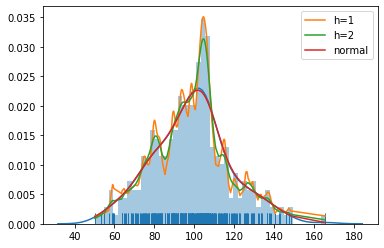

In [4]:
sb.distplot(test[:, 0], rug=True, bins=50)
sb.lineplot(test[:, 0], density1, label='h=1')
sb.lineplot(test[:, 0], density2, label='h=2')
sb.lineplot(test[:, 0], density3, label='normal')

In [5]:
# 回傳 KDE 模型
def build_kde(data):
    data = data[:, np.newaxis]
    h = (4/3*np.std(data)**5/len(data))**(1/5)
    return KernelDensity(kernel='gaussian', bandwidth=h).fit(data)

## 2. Model

In [6]:
n_samples = 300
sensor = ['light', 'sound', 'time', 'orientY']

### Kitchen

In [7]:
# cook
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(60, 20, n_samples)
time_category = [16, 17, 18, 19]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
cook = dict(light=light, sound=sound, time=time, orientY=orientY)
cook_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [8]:
# clean
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(80, 20, n_samples)
time_category = [19, 20]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
clean = dict(light=light, sound=sound, time=time, orientY=orientY)
clean_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Bedroom

In [9]:
# sleep
light = np.random.normal(20, 5, n_samples)
sound = np.random.normal(30, 10, n_samples)
time_category = [22, 23, 0, 1, 2, 3, 4, 5, 6, 7, 8]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 5, n_samples)
sleep = dict(light=light, sound=sound, time=time, orientY=orientY)
sleep_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [10]:
# study
light = np.random.normal(100, 20, n_samples)
sound = np.random.normal(50, 10, n_samples)
time_category = [18, 19, 20]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 10, n_samples)
study = dict(light=light, sound=sound, time=time, orientY=orientY)
study_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Living Room

In [11]:
# tv
light = np.random.normal(300, 20, n_samples)
sound = np.random.normal(80, 30, n_samples)
time_category = [17, 18, 19, 20, 21, 22, 23]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(0, 10, n_samples)
tv = dict(light=light, sound=sound, time=time, orientY=orientY)
tv_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

In [12]:
# eat
light = np.random.normal(200, 20, n_samples)
sound = np.random.normal(70, 10, n_samples)
time_category = [7, 8, 12, 13, 18, 19]
time = np.random.choice(time_category, n_samples)
orientY = np.random.normal(90, 10, n_samples)
eat = dict(light=light, sound=sound, time=time, orientY=orientY)
eat_kde = dict(light=build_kde(light), sound=build_kde(sound), time=build_kde(time), orientY=build_kde(orientY))

### Model KDE

同地點的比較

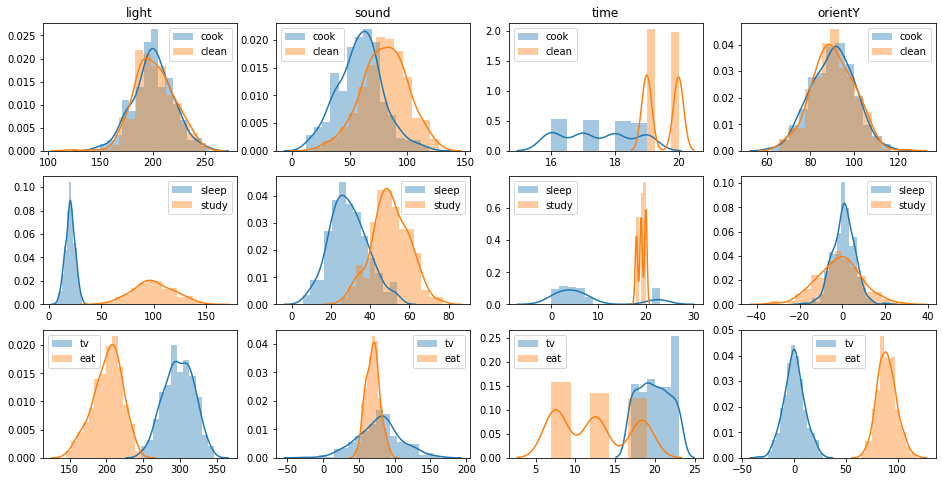

In [13]:
fig, ax = plt.subplots(3, 4, figsize=(16, 8))

for i in range(len(sensor)):
    # kitchen
    ax[0, i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[0, i], label='cook')
    sb.distplot(clean[sensor[i]], ax=ax[0, i], label='clean')
    ax[0, i].legend()
    # bedroom
    sb.distplot(sleep[sensor[i]], ax=ax[1, i], label='sleep')
    sb.distplot(study[sensor[i]], ax=ax[1, i], label='study')
    ax[1, i].legend()
    # living room
    sb.distplot(tv[sensor[i]], ax=ax[2, i], label='tv')
    sb.distplot(eat[sensor[i]], ax=ax[2, i], label='eat')
    ax[2, i].legend()

不同地點的比較

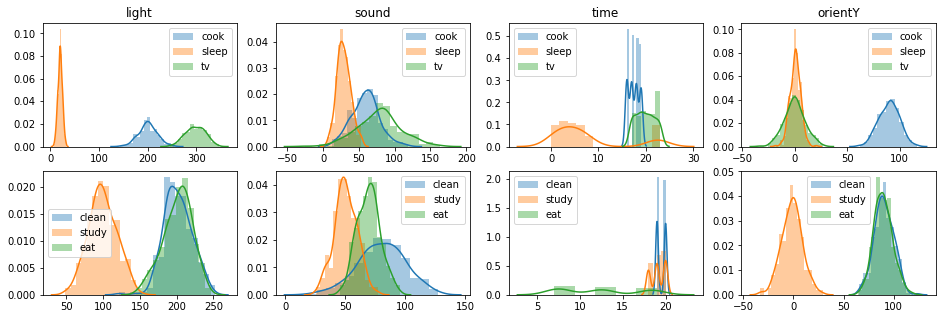

In [14]:
fig, ax = plt.subplots(2, 4, figsize=(16, 5))

for i in range(len(sensor)):
    ax[0, i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[0, i], label='cook')
    sb.distplot(sleep[sensor[i]], ax=ax[0, i], label='sleep')
    sb.distplot(tv[sensor[i]], ax=ax[0, i], label='tv')
    ax[0, i].legend()
    sb.distplot(clean[sensor[i]], ax=ax[1, i], label='clean')
    sb.distplot(study[sensor[i]], ax=ax[1, i], label='study')
    sb.distplot(eat[sensor[i]], ax=ax[1, i], label='eat')
    ax[1, i].legend()

不同情境的比較

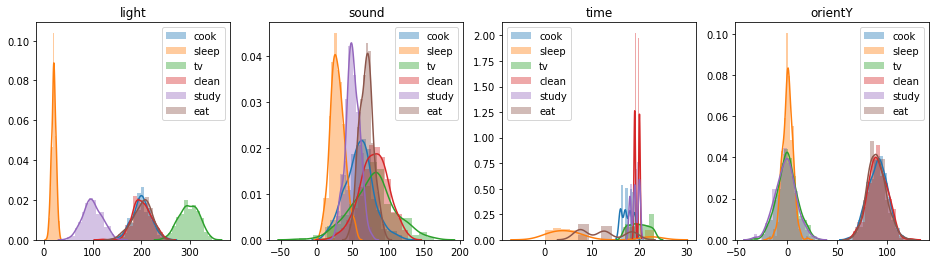

In [15]:
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(len(sensor)):
    ax[i].set_title(sensor[i])
    sb.distplot(cook[sensor[i]], ax=ax[i], label='cook')
    sb.distplot(sleep[sensor[i]], ax=ax[i], label='sleep')
    sb.distplot(tv[sensor[i]], ax=ax[i], label='tv')
    sb.distplot(clean[sensor[i]], ax=ax[i], label='clean')
    sb.distplot(study[sensor[i]], ax=ax[i], label='study')
    sb.distplot(eat[sensor[i]], ax=ax[i], label='eat')
    ax[i].legend()

## 3. Estimation

In [16]:
n_particles = 10
model = dict(cook=cook_kde, clean=clean_kde, sleep=sleep_kde, study=study_kde, tv=tv_kde, eat=eat_kde)

假設馬克夫鏈：廚房 <-> 客廳 <-> 臥室


可到達的情境機率相同：$1/(walkable\ situation)$


情境越多，機率越小，越不容易改變情境

In [17]:
situation = ['cook', 'clean', 'sleep', 'study', 'tv', 'eat']
markov = {
    'cook': ['clean', 'tv', 'eat'],
    'clean': ['cook', 'tv', 'eat'],
    'tv': ['clean', 'cook', 'eat', 'sleep', 'study'],
    'eat': ['clean', 'cook', 'tv', 'sleep', 'study'],
    'sleep': ['study', 'tv', 'eat'],
    'study': ['sleep', 'tv', 'eat']
}

### Metropolis Hasting

In [18]:
def draw_situation(curr_situation):
    proposal = np.random.choice(markov[curr_situation], 1)[0] # 取值
    alpha = min(1, 1/len(markov[curr_situation])) # acceptance probability
    # 隨機亂數並比較 alpha，小於即改變狀態
    if np.random.rand() <= alpha:
        curr_situation = proposal
    return curr_situation

In [19]:
curr_situation = 'cook'
for i in range(5):
    curr_situation = draw_situation(curr_situation)
    print(curr_situation)

cook
cook
cook
cook
cook


### Weighting

In [20]:
# sleep，轉二維
def test_data1():
    light = np.random.normal(30, 10, n_samples)[:, np.newaxis]
    sound = np.random.normal(20, 10, n_samples)[:, np.newaxis]
    time_category = [23, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    time = np.random.choice(time_category, n_samples)[:, np.newaxis]
    orientY = np.random.normal(5, 10, n_samples)[:, np.newaxis]
    return dict(light=light, sound=sound, time=time, orientY=orientY)

# eat
def test_data2():
    light = np.random.normal(200, 30, n_samples)[:, np.newaxis]
    sound = np.random.normal(70, 20, n_samples)[:, np.newaxis]
    time_category = [7, 8, 9, 12, 13, 18, 19, 20]
    time = np.random.choice(time_category, n_samples)[:, np.newaxis]
    orientY = np.random.normal(90, 20, n_samples)[:, np.newaxis]
    return dict(light=light, sound=sound, time=time, orientY=orientY)

In [21]:
def compute_particle_weight(data, curr_situation, particle_weight):
    curr_model = model[curr_situation]
    sensor_weight = 0
    # all sensor weights
    for i, curr_sensor in enumerate(sensor):
        log_score = curr_model[curr_sensor].score(data[curr_sensor])
        sensor_weight = sensor_weight + log_score
    # particle weight
    particle_weight = particle_weight + sensor_weight
    return particle_weight

In [22]:
data = test_data1()
curr_situation = 'sleep'
print(compute_particle_weight(data, curr_situation, 0))
curr_situation = 'cook'
print(compute_particle_weight(data, curr_situation, 0))

-7135.193470863023
-228576.91320052164


In [23]:
data = test_data2()
curr_situation = 'eat'
print(compute_particle_weight(data, curr_situation, 0))
curr_situation = 'tv'
print(compute_particle_weight(data, curr_situation, 0))

-6264.140308292824
-82761.00462008061


In [24]:
all_weight = np.zeros(n_particles)

In [25]:
for i in range(n_particles):
    all_weight[i] = compute_particle_weight(data, curr_situation, all_weight[i])

In [26]:
all_weight

array([-82761.00462008, -82761.00462008, -82761.00462008, -82761.00462008,
       -82761.00462008, -82761.00462008, -82761.00462008, -82761.00462008,
       -82761.00462008, -82761.00462008])

In [27]:
all_weight / np.linalg.norm(all_weight)

array([-0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777,
       -0.31622777, -0.31622777, -0.31622777, -0.31622777, -0.31622777])